In [69]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as seabornInstance

# Раздел 1 - Линейные регрессионные модели

## 1.1. Теоретический материал – Линейные регрессионные модели

Линейная регрессия

Линейная регрессия (Linear regression) – модель зависимости переменной
x от одной или нескольких других переменных (факторов, регрессоров,
независимых переменных) с линейной функцией зависимости. Линейная
регрессия относится к задаче определения «линии наилучшего соответствия»
через набор точек данных и стала простым предшественником нелинейных
методов, которые используют для обучения нейронных сетей.

Цель линейной регрессии — поиск линии, которая наилучшим образом
соответствует этим точкам. Напомним, что общее уравнение для прямой есть
𝑓 (𝑥) = 𝑏 + 𝑚 ⋅ 𝑥 +, где 𝑚 – наклон линии, а 𝑏 – его сдвиг.

**Функция потерь — метод наименьших квадратов**

Функция потерь – это мера количества ошибок, которые наша линейная
регрессия делает на наборе данных. Хотя есть разные функции потерь, все они
вычисляют расстояние между предсказанным значением 𝑦(х) и его
фактическим значением.

Одна очень распространенная функция потерь называется средней
квадратичной ошибкой MSE. Чтобы вычислить MSE, мы просто берем все
значения ошибок, считаем их квадраты длин и усредняем.

**Задача экраполяции**

Допустим у нас есть много экспериментальных точек. Необходимо через
них провести кривую, которая как можно ближе проходила к этим точкам. При
этом необходимо минимизировать среднюю квадратичную ошибку (MSE).

Для решения данной задачи в Python есть множество библиотек. Самыми
распостраненными выступают:

**numpy - numpy.linalg.lstsq**

**scipy - scipy.linalg** (содержит все функции из numpy.linalg плюс часть
новых функций, которых нет в numpy.linalg).

## 1.1.1 Пример

**Задача:**

>Проведем прямую 𝑦 = 𝑚𝑥 + 𝑏 через экспериментальные точки.

**Решение:**

In [3]:
x = np.array([0,1,2,3])
y = np.array([-1, 0.2, 0.9, 2.1])

A = np.vstack([x, np.ones(len(x))]).T
A

array([[0., 1.],
       [1., 1.],
       [2., 1.],
       [3., 1.]])

In [ ]:
m, c = np.linalg.lstsq(A, y, rcond = None)[0]
print(m,c)

0.9999999999999999 -0.9499999999999997


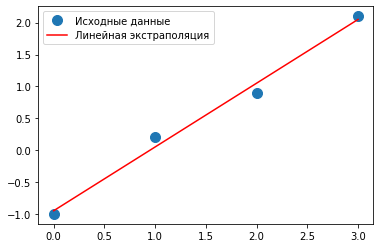

In [ ]:
plt.plot(x,y,'o', label = "Исходные данные", markersize = 10)
plt.plot(x, m*x+c, 'r', label = "Линейная экстраполяция")
plt.legend()
plt.show()

## 1.1.2 Пример

**Задача:**

>Пусть 𝑥, 𝑦 – вектора длиной 𝑛 > 3 (точек > 3). Задача заключается в
построении эстраполяционного полинома второго порядка (параболы). Таким
образом, необходимо найти такие коэффициенты поринома 𝑎, 𝑏, 𝑐 по методу
наименьших квадратов. Данные могут быть получены в результате
измерений. Покажем пример генерации данных случайным образом и
загрузки их из файла.

**Решение:**

In [122]:
delta = 1.0
x = np.linspace(-5,5,11)
y = x**2+delta*(np.random.rand(11)-0.5)
x += delta*(np.random.rand(11)-0.5)

x.tofile('x_data.txt', '\n')
y.tofile('y_data.txt', '\n')

In [123]:
x = np.fromfile('x_data.txt', float, sep = "\n")
y = np.fromfile('y_data.txt', float, sep = '\n')
print(x)
print(y)

[-4.91193526 -4.13024414 -3.12944668 -1.78111033 -0.59402625 -0.18255482
  0.82341315  2.37546974  3.29570983  3.54698583  4.72736759]
[25.32100438 15.68473725  8.6229357   3.56941463  1.43365182 -0.13530609
  0.93738523  4.27429127  9.09796737 15.93375248 25.14155596]


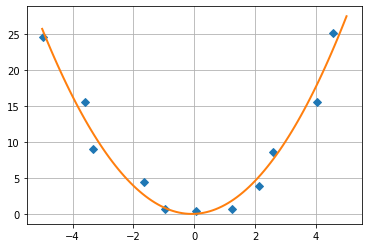

In [26]:
m = np.vstack((x**2, x, np.ones(11))).T
s = np.linalg.lstsq(m,y,rcond = None)[0]
x_prec = np.linspace(-5,5,101)
plt.plot(x,y,'D')

plt.plot(x_prec, s[0]*x_prec**2+s[1]*x_prec+s[2], '-', lw = 2)
plt.grid()
plt.savefig('парабола.png')

## 1.1.3 Пример

**Задача:**

>По данным предыдущего примера постройте эстраполяционного полинома
третьего порядка

**Решение:**

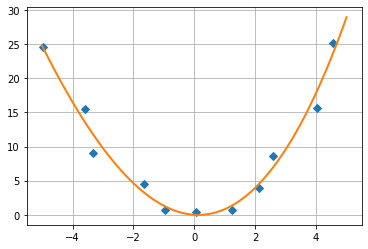

In [27]:
m = np.vstack((x**3,x**2, x, np.ones(11))).T
s = np.linalg.lstsq(m,y,rcond = None)[0]
x_prec = np.linspace(-5,5,101)
plt.plot(x,y,'D')

plt.plot(x_prec, s[0]*x_prec**3+s[1]*x_prec**2+x_prec*s[2]+s[3], '-', lw = 2)
plt.grid()
plt.savefig('полином 3-й степени.png')

## Задание

**Задание:**

>Представьте собственные данные и постройте эктраполяцию полиномами
первой, второй и третьей степени.

**Решение:**

### полином 2-й степени

In [124]:
delta = 1.4
x = np.linspace(-10,10,11)
y = x**2+delta*(np.random.rand(11)-0.5)
x += delta*(np.random.rand(11)-0.5)

In [125]:
x.tofile('x_data_ex.txt', '\n')
y.tofile('y_data_ex.txt', '\n')

In [126]:
x = np.fromfile('x_data_ex.txt', float, sep = "\n")
y = np.fromfile('y_data_ex.txt', float, sep = '\n')
print(x)
print(y)

[-9.87268887 -8.58230567 -6.59559569 -4.03914285 -1.97883754  0.68550449
  2.20284494  4.44924992  6.06553259  7.42111942  9.60116645]
[100.08365292  63.59761008  35.43678008  16.23507611   4.59739264
   0.69705849   4.53672542  15.42198938  35.45269657  64.50105255
  99.89771695]


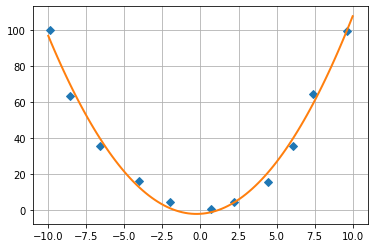

In [127]:
m = np.vstack((x**2, x, np.ones(11))).T
s = np.linalg.lstsq(m,y,rcond = None)[0]
x_prec = np.linspace(-10,10,101)
plt.plot(x,y,'D')

plt.plot(x_prec, s[0] * x_prec**2 + s[1]*x_prec + s[2], '-', lw = 2)
plt.grid()
plt.savefig('Парабола 2.png')

### полином 3-й степени

In [128]:
delta = 1.5
x = np.linspace(-10,10,11)
y = x**3 + delta*(np.random.rand(11)-0.5)
x += delta*(np.random.rand(11)-0.5)

In [129]:
x.tofile('x_data_ex.txt', '\n')
y.tofile('y_data_ex.txt', '\n')

In [130]:
x = np.fromfile('x_data_ex.txt', float, sep = "\n")
y = np.fromfile('y_data_ex.txt', float, sep = '\n')
print(x)
print(y)

[-9.79002902 -7.26087774 -6.03132788 -4.40878755 -2.2618051   0.56452705
  2.2064588   3.90546931  5.97940691  8.44293412 10.49321265]
[-1.00045324e+03 -5.12121692e+02 -2.16625084e+02 -6.36469537e+01
 -7.83946907e+00 -2.40467125e-01  7.57085107e+00  6.35622780e+01
  2.15449584e+02  5.11486692e+02  1.00020401e+03]


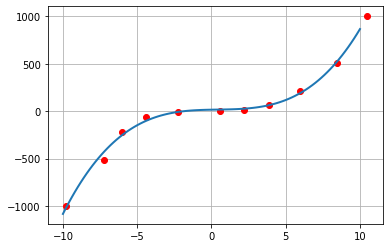

In [131]:
m = np.vstack((x**3, x**2, x, np.ones(11))).T
s = np.linalg.lstsq(m,y,rcond = None)[0]
x_prec = np.linspace(-10,10,101)
# m
plt.plot(x,y,'ro')

plt.plot(x_prec,s[0]*x_prec**3 + s[1] * x_prec**2 + s[2]*x_prec + s[3], '-', lw = 2)
plt.grid()
plt.savefig('Прямая.png')

### полином 1-й степени

In [132]:
delta = 1.3
x = np.linspace(-10,10,11)
y = x+ delta*(np.random.rand(11)-0.5)
x += delta*(np.random.rand(11)-0.5)

In [133]:
x.tofile('x_data_ex.txt', '\n')
y.tofile('y_data_ex.txt', '\n')

In [134]:
x = np.fromfile('x_data_ex.txt', float, sep = "\n")
y = np.fromfile('y_data_ex.txt', float, sep = '\n')
print(x)
print(y)

[-10.57740865  -7.40648958  -5.72930663  -3.50973888  -1.36282663
   0.23074314   2.43707861   4.21996371   6.03435266   7.51697709
  10.59718552]
[-10.41660155  -8.44581113  -6.53949064  -4.58173679  -2.64874556
  -0.50004725   1.35153273   3.84273962   6.31375735   8.0292731
  10.25210234]


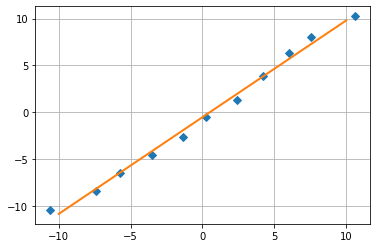

In [135]:
m = np.vstack((x, np.ones(11))).T
s = np.linalg.lstsq(m,y,rcond = None)[0]
x_prec = np.linspace(-10,10,101)
# m
plt.plot(x,y,'D')

plt.plot(x_prec, s[0] * x_prec + s[1], '-', lw = 2)
plt.grid()
plt.savefig('Полином 3-й степени 2.png')

## 1.1.4 Пример

**Задача:**

>Необходимо проверить гипотезу, что наши точечно заданная функция ложится
на кривую вида 

$$f(x,b) = b_{0} + b_{1}exp(-b_{2}x^{2})$$

**Решение:**

In [55]:
beta = (0.25, 0.75, 0.5)
def f(x, b0, b1, b2):
  return b0+b1*np.exp(-b2*x**2)

xdata = np.linspace(0,5,50)
y = f(xdata, *beta)

ydata = y+ 0.05*np.random.randn(len(xdata))
print(xdata)
print(ydata)

[0.         0.10204082 0.20408163 0.30612245 0.40816327 0.51020408
 0.6122449  0.71428571 0.81632653 0.91836735 1.02040816 1.12244898
 1.2244898  1.32653061 1.42857143 1.53061224 1.63265306 1.73469388
 1.83673469 1.93877551 2.04081633 2.14285714 2.24489796 2.34693878
 2.44897959 2.55102041 2.65306122 2.75510204 2.85714286 2.95918367
 3.06122449 3.16326531 3.26530612 3.36734694 3.46938776 3.57142857
 3.67346939 3.7755102  3.87755102 3.97959184 4.08163265 4.18367347
 4.28571429 4.3877551  4.48979592 4.59183673 4.69387755 4.79591837
 4.89795918 5.        ]
[0.97409225 0.98435978 1.02463355 0.85630305 0.9388117  0.87252538
 0.86323172 0.74284148 0.87616252 0.70402477 0.68320216 0.63038925
 0.66221732 0.56611524 0.62890502 0.39933059 0.42959879 0.40382521
 0.33821432 0.32797099 0.37412934 0.3060699  0.31205262 0.31204504
 0.30460973 0.24333681 0.16213791 0.27465728 0.22547546 0.29409047
 0.29624303 0.30439055 0.29345936 0.38562689 0.21685268 0.20740376
 0.24690337 0.2866233  0.23409097 0.24

In [54]:
beta_opt, beta_cov = scipy.optimize.curve_fit(f,xdata, ydata)
beta_opt

array([0.25586407, 0.69942561, 0.44105688])

In [57]:
lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

0.0002250416150231656
0.12696780580754663


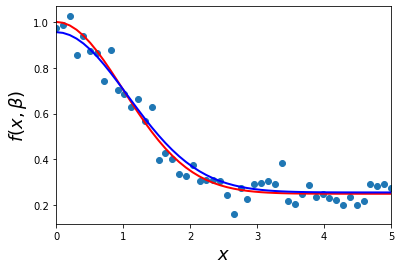

In [63]:
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw = 2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw = 2)
ax.set_xlim(0,5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

## 1.1.5 Пример

Задача:

Необходимо проверить гипотезу, что наши точечно заданная функция ложится
на кривые вида:

1)
$$f(x,b) = b_{0}+b_{1}x$$

2)
$$f(x,b) = b_{0} + b_{1}x + b_{2}x^{2}$$
3)
$$f(x,b) = b_{0}+b_{1}\ln{(x)}$$
4)
$$f(x,b) = b_{0}x^{b_{1}}$$

Решение:

In [65]:
#1
beta = (0.25,0.75)
def f(x, b0, b1):
  return b0+b1*x

xdata = np.linspace(0,5,50)

y = f(xdata, *beta)
ydata = y+0.05*np.random.randn(len(xdata))

beta_opt, beta_cov = scipy.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)

lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

[0.24575709 0.74864349]
0.00015709157129658723
0.1381322452183842


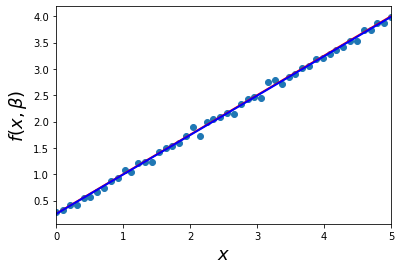

In [66]:
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw = 2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw = 2)
ax.set_xlim(0,5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

In [67]:
#2
beta = (0.5,0.65,0.56)
def f(x, b0, b1,b2):
  return b0+b1*x+b2*x**2

xdata = np.linspace(0,5,50)

y = f(xdata, *beta)
ydata = y+0.05*np.random.randn(len(xdata))

beta_opt, beta_cov = scipy.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)

lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

[0.24700184 0.75386387 0.49916606]
8.626723630193176e-05
0.07193784830724045


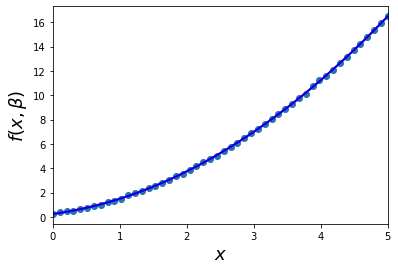

In [68]:
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw = 2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw = 2)
ax.set_xlim(0,5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

In [70]:
#3
beta = (1,2)
def f(x, b0, b1):
  return b0+b1*np.log(x)

xdata = np.linspace(1,5,50)

y = f(xdata, *beta)
ydata = y+0.05*np.random.randn(len(xdata))

beta_opt, beta_cov = scipy.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)

lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

[0.99575411 2.00262629]
4.3639834702022555e-05
0.10091455866504456


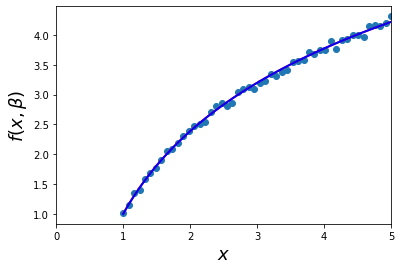

In [71]:
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw = 2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw = 2)
ax.set_xlim(0,5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

In [26]:
#4
beta = (1,2)
def f(x, b0, b1):
  return b0+x**b1

xdata = np.linspace(1,5,50)

y = f(xdata, *beta)
ydata = y+0.05*np.random.randn(len(xdata))

beta_opt, beta_cov = scipy.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)

lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

[0.98705766 2.00059722]
9.29993026824665e-05
0.12966429995706444


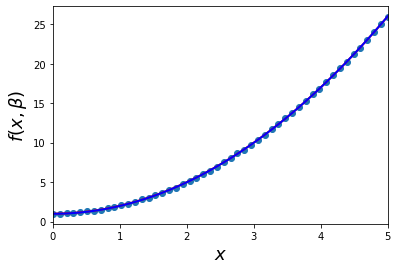

In [27]:
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw = 2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw = 2)
ax.set_xlim(0,5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

## Задание

**Задание:**

>Подставьте собственные данные и поэкспериментируйте с представленными
функциями. Проанализируйте динамику изменения данных.

**Решение:**

In [24]:
def f1(x, b0, b1):
  return b0+b1*x

def f2(x, b0, b1,b2):
  return b0+b1*x+b2*x**2

def f3(x, b0, b1):
  return b0+b1*np.log(x)

def f4(x, b0, b1):
  return b0+x**b1

In [41]:
beta1 = (0.45,0.55)
beta2 = (0.32,0.65,0.95)
beta34 = (3,4)

In [42]:
x_data = np.linspace(0,7,50)
x_data_3 = np.linspace(1,4,50)

In [43]:
y1 = f1(x_data, *beta1)
y_data_1 = y1+0.05*np.random.randn(len(xdata))
y2 = f2(x_data, *beta2)
y_data_2 = y2+0.05*np.random.randn(len(xdata))
y3 = f3(x_data_3, *beta34)
y_data_3 = y3+0.05*np.random.randn(len(xdata))
y4 = f4(x_data, *beta34)
y_data_4 = y4+0.05*np.random.randn(len(xdata))

In [44]:
beta_opt_1, beta_cov_1 = scipy.optimize.curve_fit(f1, x_data, y_data_1)
print(beta_opt_1)
beta_opt_2, beta_cov_2 = scipy.optimize.curve_fit(f2, x_data, y_data_2)
print(beta_opt_2)
beta_opt_3, beta_cov_3 = scipy.optimize.curve_fit(f3, x_data_3, y_data_3)
print(beta_opt_3)
beta_opt_4, beta_cov_4 = scipy.optimize.curve_fit(f4, x_data, y_data_4)
print(beta_opt_4)

[0.4253741  0.55372989]
[0.32874477 0.64952594 0.94983067]
[2.99129046 4.00531823]
[2.99227775 3.99999966]


In [45]:
lin_dev_1 = sum(beta_cov_1[0])
print(lin_dev_1)
lin_dev_2 = sum(beta_cov_2[0])
print(lin_dev_2)
lin_dev_2 = sum(beta_cov_2[0])
print(lin_dev_2)
lin_dev_2 = sum(beta_cov_2[0])
print(lin_dev_2)

0.00015741023701316113
0.00022996608096489992
0.00022996608096489992
0.00022996608096489992


In [46]:
residuals_1 = y_data_1 - f1(x_data, *beta_opt_1)
fres_1 = sum(residuals_1**2)
print(fres_1)
residuals_2 = y_data_2 - f2(x_data, *beta_opt_2)
fres_2 = sum(residuals_2**2)
print(fres_2)
residuals_3 = y_data_3 - f3(x_data_3, *beta_opt_3)
fres_3 = sum(residuals_3**2)
print(fres_3)
residuals_4 = y_data_4 - f4(x_data, *beta_opt_4)
fres_4 = sum(residuals_4**2)
print(fres_4)

0.12350649285277188
0.1296773907534261
0.14139608814287996
0.1305443015563753


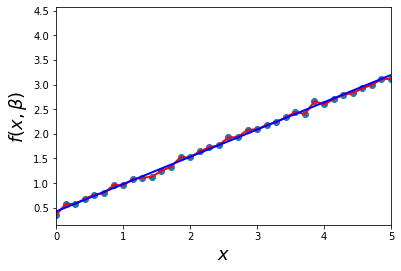

In [49]:
fig, ax = plt.subplots()
ax.scatter(x_data, y_data_1)
ax.plot(x_data, y_data_1, 'r', lw = 2)
ax.plot(x_data, f1(x_data, *beta_opt_1), 'b', lw = 2)
ax.set_xlim(0,5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

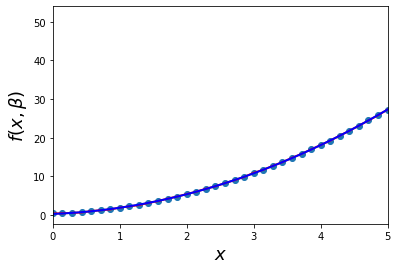

In [50]:
fig, ax = plt.subplots()
ax.scatter(x_data, y_data_2)
ax.plot(x_data, y_data_2, 'r', lw = 2)
ax.plot(x_data, f2(x_data, *beta_opt_2), 'b', lw = 2)
ax.set_xlim(0,5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

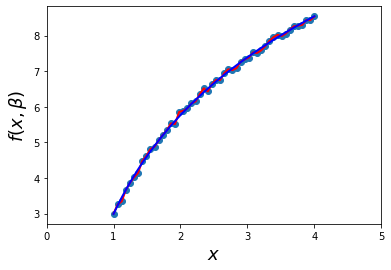

In [51]:
fig, ax = plt.subplots()
ax.scatter(x_data_3, y_data_3)
ax.plot(x_data_3, y_data_3, 'r', lw = 2)
ax.plot(x_data_3, f3(x_data_3, *beta_opt_3), 'b', lw = 2)
ax.set_xlim(0,5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

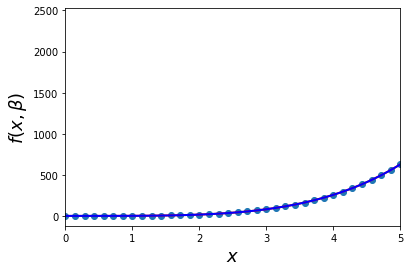

In [52]:
fig, ax = plt.subplots()
ax.scatter(x_data, y_data_4)
ax.plot(x_data, y_data_4, 'r', lw = 2)
ax.plot(x_data, f4(x_data, *beta_opt_4), 'b', lw = 2)
ax.set_xlim(0,5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

# Раздел 2 - Задачи регрессии

## 1.2. Теоретический материал – Задачи регрессии

**Линейная регрессия** - это широко используемый метод статистического
анализа, который использует регрессионный анализ в математической
статистике для определения количественной взаимосвязи между двумя или
более переменными. Если регрессионный анализ включает две или более
независимых переменных, а связь между зависимой и независимой переменными является линейной, тогда имееи дело с множественной линейной
регрессией.

В этом разделе мы увидим, как библиотеку Scikit-Learn в Python для машинного
обучения можно использовать для реализации функций регрессии. Мы начнем
с простой линейной регрессии с участием двух переменных, а затем перейдем к
линейной регрессии с участием нескольких переменных.

## 1.2.1 Пример

**Задача:**

>Построим простую линейную регрессию в Python с использованием
библиотеки scikit-learn

**Решение:**

In [10]:
my_dict = {'Учебное время': [0.50, 0.75, 1.00,1.25, 1.50, 1.75, 1.75, 
                             2.00, 2.25, 2.5, 2.75, 3.00, 3.25, 3.5,
                             4.00, 4.25, 4.50, 4.75, 5.00, 5.5],
           'Оценка': [10,22,13,43,20,22,33,50,62,48,55,75,62,73, 81,76, 64, 82,90,93]}
dataset = pd.DataFrame(my_dict)
dataset.head()

,Учебное время,Оценка
0,0.50,10
1,0.75,22
2,1.00,13
3,1.25,43
4,1.50,20


In [11]:
print(dataset.shape)
dataset.describe()

(20, 2)


,Учебное время,Оценка
count,20.000000,20.000000
mean,2.787500,53.700000
std,1.507165,26.435821
min,0.500000,10.000000
25%,1.687500,30.250000
50%,2.625000,58.500000
75%,4.062500,75.250000
max,5.500000,93.000000


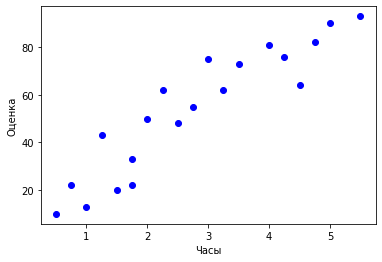

In [12]:
plt.scatter(dataset['Учебное время'], dataset['Оценка'], color = 'b', label = "данные экзамена")
plt.xlabel("Часы")
plt.ylabel("Оценка")
plt.show()

После того как мы получили представление о данных, разделим информацию
на «атрибуты» и «метки». Атрибуты – это независимые переменные, а метки
– это зависимые переменные, значения которых должны быть предсказаны. В
нашем наборе всего два столбца и необходимо предсказать оценку в
зависимости от количества часов. Чтобы извлечь атрибуты и метки,
выполните следующий скрипт:

In [13]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values
print(x)
print(y)

[[0.5 ]
 [0.75]
 [1.  ]
 [1.25]
 [1.5 ]
 [1.75]
 [1.75]
 [2.  ]
 [2.25]
 [2.5 ]
 [2.75]
 [3.  ]
 [3.25]
 [3.5 ]
 [4.  ]
 [4.25]
 [4.5 ]
 [4.75]
 [5.  ]
 [5.5 ]]
[10 22 13 43 20 22 33 50 62 48 55 75 62 73 81 76 64 82 90 93]


In [23]:
x_train, x_test, y_train, y_test = train_test_split(
    x,y,test_size = 0.2, random_state = 0
)

regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [24]:
print(regressor.intercept_)
print(regressor.coef_)

5.475400029908791
[17.02706744]


Получившийся результат можно интерпретировать следующим образом: с
каждым затраченным часом на обучение результат экзамена повышается
приблизительно на 17 баллов. Далее можно построить прогнозы. Для этого мы
будем использовать наши тестовые данные и посмотрим, насколько точно наш
алгоритм предсказывает процентную оценку. Чтобы сделать прогноз на
тестовых данных необходимо выполнить следующий код:

In [25]:
y_pred = regressor.predict(x_test)

df = pd.DataFrame({'Actual':y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,90,90.610737
1,22,18.245701
2,93,99.124271
3,62,43.786302


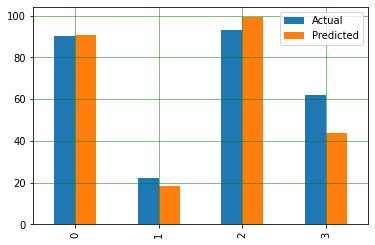

In [26]:
df.plot(kind = 'bar')
plt.grid(which = 'major', linestyle = '-', linewidth = '0.5', color = 'green')
plt.grid(which = 'minor', linestyle = ':', linewidth = '0.5', color = 'black')
plt.show()

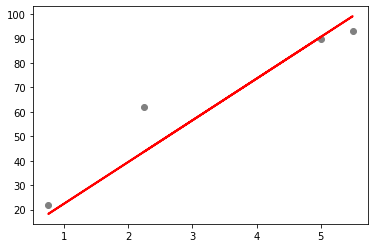

In [27]:
plt.scatter(x_test, y_test, color = 'gray')
plt.plot(x_test, y_pred, color = 'red', linewidth = 2)
plt.show()

## Задание

**Задание:**

>Постройте модель линейной регрессии для произвольных данных из двух
столбцов. Для примера можно взять точечную зависимость заработной платы от
опыта работы:
(https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linearregression/master/Salary_Data.csv).
Найдите коэффициенты линии регрессии. Постройте прогноз.

**Решение:**

In [70]:
url = 'https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv'

dataset = pd.read_csv(url)
dataset.head(5)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [71]:
print(dataset.shape)
dataset.describe()

(30, 2)


,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


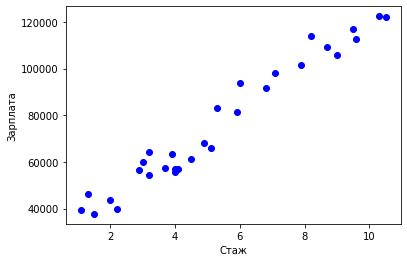

In [72]:
plt.scatter(dataset['YearsExperience'], dataset['Salary'], color = 'b', label = "данные экзамена")
plt.xlabel("Стаж")
plt.ylabel("Зарплата")
plt.show()

In [73]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values
print(x)
print(y)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


In [74]:
x_train, x_test, y_train, y_test = train_test_split(
    x,y,test_size = 0.2, random_state = 0
)

regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [75]:
print(regressor.intercept_)
print(regressor.coef_)

26780.09915062818
[9312.57512673]


In [76]:
y_pred = regressor.predict(x_test)

df = pd.DataFrame({'Actual':y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,37731.0,40748.961841
1,122391.0,122699.622956
2,57081.0,64961.657170
3,63218.0,63099.142145
4,116969.0,115249.562855
5,109431.0,107799.502753


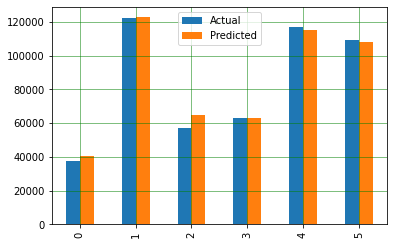

In [77]:
df.plot(kind = 'bar')
plt.grid(which = 'major', linestyle = '-', linewidth = '0.5', color = 'green')
plt.grid(which = 'minor', linestyle = ':', linewidth = '0.5', color = 'black')
plt.show()

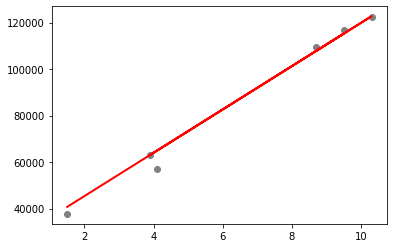

In [78]:
plt.scatter(x_test, y_test, color = 'gray')
plt.plot(x_test, y_pred, color = 'red', linewidth = 2)
plt.show()

# Раздел 2 - Множественная регрессия

## 1.3. Теоретический материал – Множественная регрессия

В предыдущем примере мы проиллюстрировали линейную регрессию
с двумя переменными. Однако, почти все реальные задачи имеют больше
параметров. Линейная регрессия с участием нескольких переменных
называется «множественной линейной регрессией» или многомерной
линейной регрессией. Шаги для выполнения множественной линейной
регрессии аналогичны шагам для простой . Разница заключается в оценке.
Вы можете использовать множественную регрессию, чтобы узнать, какой
фактор оказывает наибольшее влияние на прогнозируемый результат или
как различные переменные связаны друг с другом.

## 1.3.1 Пример

**Задача:**

> Для решения задачи множественной регрессии можно задействовать уже
известный метод numpy.linalg.lstsq.

**Решение:**

In [13]:
y = [1,2,3,4,3,4,5,3,5,5,4,5,4,5,4,5,6,0,6,3,1,3,1]
x = [[0,2,4,1,5,4,5,9,9,9,3,7,8,8,6,6,5,5,5,6,6,5,5],
     [4,1,2,3,4,5,6,7,5,8,7,8,7,8,7,8,6,8,9,2,1,5,6],
     [4,1,2,5,6,7,8,9,7,8,7,8,7,4,3,1,2,3,4,1,3,9,7]]

In [14]:
X = np.transpose(x)
X = np.c_[X, np.ones(X.shape[0])]
linreg = np.linalg.lstsq(X,y,rcond = None)[0]
print(linreg)

[ 0.1338682   0.26840334 -0.02874936  1.5122571 ]


## 1.3.2 Пример

**Задача:**

>Для данных из предыдущей задачи построить модель множественной
линейной регрессии с использованием средств библиотеки sсikit-learn.

**Решение:**

In [15]:
new_y = np.array(y)
new_y = new_y.transpose()
df1 = pd.DataFrame(new_y)
new_X = np.array(x)
new_X = new_X.transpose()
df2 = pd.DataFrame(new_X)
df1 = df1.rename(columns = {0:'y'}, inplace = False)
df2 = df2.rename(columns = {0:'x1',1:'x2',2:'x3'}, inplace = False)

frames = [df1,df2]
dataset = pd.concat(frames, axis=1, join = "inner")
dataset.head()

,y,x1,x2,x3
0,1,0,4,4
1,2,2,1,1
2,3,4,2,2
3,4,1,3,5
4,3,5,4,6


In [16]:
print(dataset.shape)
dataset.describe()

(23, 4)


,y,x1,x2,x3
count,23.000000,23.000000,23.000000,23.000000
mean,3.565217,5.347826,5.521739,5.043478
std,1.674029,2.404706,2.428422,2.704849
min,0.000000,0.000000,1.000000,1.000000
25%,3.000000,4.500000,4.000000,3.000000
50%,4.000000,5.000000,6.000000,5.000000
75%,5.000000,6.500000,7.500000,7.000000
max,6.000000,9.000000,9.000000,9.000000


In [17]:
X = dataset[['x1','x2','x3']]
Y = dataset['y']

In [20]:
x_train,x_test,y_train,y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [22]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns = ['Coefficient'])
coeff_df

,Coefficient
x1,0.223219
x2,0.136709
x3,-0.063757


In [23]:
y_pred = regressor.predict(x_test)
df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
11,5,4.119478
10,4,3.153648
21,3,3.199155
14,4,4.078333
20,1,3.258079


## Задание

**Задача:**

>Постройте модель множественной линейной регрессии для произвольных
данных из нескольких столбцов. Для примера можно взять потребления
газа (в миллионах галлонов) в 48 штатах США или набор данных о
качестве красного вина (1) и (2) соответственно. Найдите коэффициенты
множественной регрессии. Постройте прогноз.

1. https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv
2. https://raw.githubusercontent.com/aniruddhachoudhury/Red-WineQuality/master/winequality-red.csv

**Решение:**

In [80]:
url = 'https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv'

dataset = pd.read_csv(url)
dataset.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [88]:
print(dataset.shape)
dataset.describe()

(48, 5)


,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [83]:
y_m = dataset["Petrol_Consumption"]
x_m = dataset[['Petrol_tax', 'Average_income', 'Paved_Highways', 'Population_Driver_licence(%)']]

In [89]:
x_train_m ,x_test_m ,y_train_m ,y_test_m  = train_test_split(x_m, y_m, test_size = 0.2, random_state = 0)

regressor = LinearRegression()
regressor.fit(x_train_m , y_train_m)

LinearRegression()

In [90]:
coeff_df = pd.DataFrame(regressor.coef_, x_m.columns, columns = ['Coefficient'])
coeff_df

,Coefficient
Petrol_tax,-40.016660
Average_income,-0.065413
Paved_Highways,-0.004741
Population_Driver_licence(%),1341.862121


In [91]:
y_pred_m = regressor.predict(x_test_m)
df_m = pd.DataFrame({'Actual':y_test_m, 'Predicted':y_pred_m})
df_m

,Actual,Predicted
29,534,469.391989
4,410,545.645464
26,577,589.668394
30,571,569.730413
32,577,649.774809
37,704,646.631164
34,487,511.608148
40,587,672.475177
7,467,502.074782
10,580,501.270734


## Задание*

**Задача:** Экспериментально получены N − значений величины Y при
различных значениях величины X. Построить полиномы первой и второй
степени, аппроксимирующие результаты эксперимента, с применением
метода наименьших квадратов. Результаты выводятся в виде таблиц
значений и графиков, полученных полиномов.

### Вариант: 2

In [137]:
x_data = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
y_data = [5.0, 5.0, 4.0, 4.0, 6.0, 6.0]

In [143]:
X_data = np.array(x_data)
y = X_data**2+1.0*(np.random.rand(6)-0.5)
X_data += 1.0*(np.random.rand(6)-0.5)

X_data.tofile('X_data.txt', '\n')
y.tofile('Y_data.txt', '\n')

In [144]:
x = np.fromfile('X_data.txt', float, sep = '\n')
y = np.fromfile('Y_data.txt', float, sep = '\n')
print(x)
print(y)

[0.26929613 0.62128984 0.2454747  0.19313253 0.95883839 0.96466065]
[0.18961502 0.11696273 0.47521969 0.72992635 0.84544417 0.86804419]


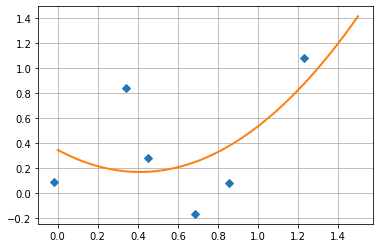

In [158]:
m = np.vstack((x**2, x, np.ones(6))).T

s = np.linalg.lstsq(m,y,rcond = None)[0]

x_prec = np.linspace(0,1.5,101)
plt.plot(x,y,'D')
# plt.plot(x_data, y_data, 'ro')

plt.plot(x_prec, s[0]*x_prec**2 + s[1]*x_prec+ s[2], '-', lw = 2)
plt.grid()
plt.savefig('star_ex_paraboloid.png')

In [150]:
X_data = np.array(x_data)
y = X_data + 1.0*(np.random.rand(6)-0.5)
X_data += 1.0*(np.random.rand(6)-0.5)

X_data.tofile('X_data.txt', '\n')
y.tofile('Y_data.txt', '\n')

In [151]:
x = np.fromfile('X_data.txt', float, sep = '\n')
y = np.fromfile('Y_data.txt', float, sep = '\n')
print(x)
print(y)

[-0.02030628  0.68796643  0.85355135  0.45067138  0.34137967  1.22987744]
[ 0.08931736 -0.16373376  0.08575651  0.28457692  0.84237842  1.07776529]


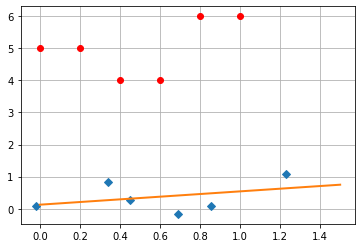

In [155]:
m = np.vstack((x, np.ones(6))).T

s = np.linalg.lstsq(m,y,rcond = None)[0]

x_prec = np.linspace(0,1.5,101)
plt.plot(x,y,'D')
plt.plot(x_data, y_data, 'ro')

plt.plot(x_prec, s[0]*x_prec + s[1], '-', lw = 2)
plt.grid()
plt.savefig('star_ex_line.png')